# 🖼️ Opérations de Base sur les Images

**Module :** 01-Images-Foundation  
**Niveau :** 🟢 Débutant  
**Technologies :** Python Pillow (PIL), NumPy, Matplotlib  
**Durée estimée :** 30 minutes  

## 🎯 Objectifs d'Apprentissage

- [ ] Charger et sauvegarder des images dans différents formats
- [ ] Effectuer des transformations géométriques (resize, crop, rotate)
- [ ] Appliquer des filtres et effets (blur, sharpen, brightness)
- [ ] Extraire et modifier les métadonnées EXIF
- [ ] Préparer des images pour les APIs de génération
- [ ] Utiliser des widgets interactifs pour la manipulation d'images

## 📚 Prérequis

- Environment Setup (module 00) complété
- Notions de base Python
- Familiarité avec les formats d'images (PNG, JPEG, etc.)

In [1]:
# Paramètres Papermill - JAMAIS modifier ce commentaire

# Configuration notebook
notebook_mode = "interactive"        # "interactive" ou "batch"
skip_widgets = False               # True pour mode batch MCP
debug_level = "INFO"               

# Configuration images
test_image_url = "https://picsum.photos/800/600"  # Image de test aléatoire
sample_image_size = (800, 600)     # Dimensions par défaut
output_format = "PNG"              # Format de sortie par défaut
output_quality = 90                # Qualité JPEG (1-100)

# Paramètres opérations
enable_filters = True              # Activer démonstrations filtres
enable_metadata = True             # Extraire métadonnées EXIF
enable_transformations = True      # Démonstrations transformations
save_results = True                # Sauvegarder résultats

# Configuration widgets
show_interactive_demo = True       # Widgets interactifs

In [2]:
# Setup environnement et imports
import os
import sys
import json
import requests
import warnings
from pathlib import Path
from datetime import datetime
from typing import Dict, List, Any, Optional, Tuple
import base64
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import logging

# Imports Pillow (PIL)
from PIL import Image, ImageFilter, ImageEnhance, ImageOps, ImageDraw, ImageFont
try:
    from PIL import ExifTags
    EXIF_AVAILABLE = True
except ImportError:
    EXIF_AVAILABLE = False
    print("⚠️  ExifTags non disponible - métadonnées EXIF désactivées")

# Widgets interactifs
try:
    import ipywidgets as widgets
    from IPython.display import display, Image as IPImage, HTML
    WIDGETS_AVAILABLE = True
except ImportError:
    WIDGETS_AVAILABLE = False
    print("⚠️  ipywidgets non disponible - mode interactif limité")

warnings.filterwarnings('ignore', category=DeprecationWarning)

# Configuration paths
GENAI_ROOT = Path.cwd()
while GENAI_ROOT.name != 'GenAI' and len(GENAI_ROOT.parts) > 1:
    GENAI_ROOT = GENAI_ROOT.parent

OUTPUT_DIR = GENAI_ROOT / 'outputs' / 'basic_operations'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Configuration logging
logging.basicConfig(level=getattr(logging, debug_level))
logger = logging.getLogger('basic_image_ops')

print(f"🖼️  Opérations de Base sur les Images")
print(f"📅 {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🔧 Mode: {notebook_mode}")
print(f"📁 Output: {OUTPUT_DIR}")
print(f"✅ PIL Version: {Image.__version__ if hasattr(Image, '__version__') else 'N/A'}")
if WIDGETS_AVAILABLE:
    print(f"✅ Widgets interactifs disponibles")

🖼️  Opérations de Base sur les Images
📅 2026-02-25 20:48:35
🔧 Mode: interactive
📁 Output: D:\Dev\CoursIA.worktrees\GenAI_Series\MyIA.AI.Notebooks\GenAI\outputs\basic_operations
✅ PIL Version: 11.2.1
✅ Widgets interactifs disponibles


## 📥 Section 1: Chargement et Formats d'Images

Démonstration du chargement d'images depuis différentes sources et conversion entre formats.


📥 CHARGEMENT ET FORMATS D'IMAGES

🌐 Chargement image depuis URL...
✅ Image chargée depuis URL

📊 Informations image:
   📐 Dimensions: 800x600
   🎨 Mode: RGB
   📦 Format: JPEG
   💾 Taille mémoire: ~1406.2 KB


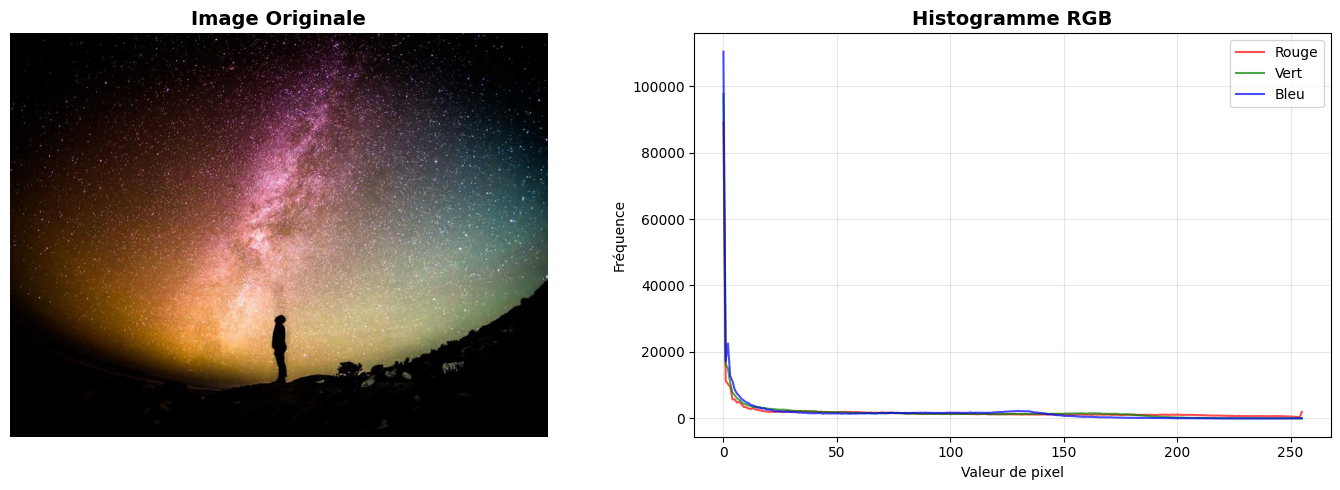


✅ Image de base chargée et analysée


In [3]:
# Utilitaires pour chargement d'images
def load_image_from_url(url: str) -> Optional[Image.Image]:
    """Charge une image depuis une URL."""
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            return Image.open(BytesIO(response.content))
    except Exception as e:
        logger.error(f"Erreur chargement URL: {e}")
    return None

def load_image_from_file(filepath: Path) -> Optional[Image.Image]:
    """Charge une image depuis un fichier local."""
    try:
        return Image.open(filepath)
    except Exception as e:
        logger.error(f"Erreur chargement fichier: {e}")
    return None

def create_test_image(size: Tuple[int, int] = (800, 600), 
                     color_mode: str = "RGB") -> Image.Image:
    """Crée une image de test avec gradient."""
    width, height = size
    img = Image.new(color_mode, (width, height))
    
    # Création d'un gradient
    pixels = img.load()
    for y in range(height):
        for x in range(width):
            r = int((x / width) * 255)
            g = int((y / height) * 255)
            b = 128
            pixels[x, y] = (r, g, b) if color_mode == "RGB" else r
    
    return img

print("\n📥 CHARGEMENT ET FORMATS D'IMAGES")
print("=" * 50)

# Tentative de chargement depuis URL
print(f"\n🌐 Chargement image depuis URL...")
test_image = load_image_from_url(test_image_url)

if test_image is None:
    print(f"⚠️  URL indisponible, création d'une image de test")
    test_image = create_test_image(sample_image_size)
else:
    print(f"✅ Image chargée depuis URL")

# Informations sur l'image
print(f"\n📊 Informations image:")
print(f"   📐 Dimensions: {test_image.size[0]}x{test_image.size[1]}")
print(f"   🎨 Mode: {test_image.mode}")
print(f"   📦 Format: {test_image.format or 'Generated'}")
print(f"   💾 Taille mémoire: ~{test_image.size[0] * test_image.size[1] * len(test_image.getbands()) / 1024:.1f} KB")

# Affichage
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].imshow(test_image)
axes[0].set_title("Image Originale", fontsize=14, fontweight='bold')
axes[0].axis('off')

# Histogram des couleurs
if test_image.mode == 'RGB':
    # Mapping des couleurs pour matplotlib (anglais)
    colors_map = {'Rouge': 'red', 'Vert': 'green', 'Bleu': 'blue'}
    
    for i, (color_idx, label) in enumerate([(0, 'Rouge'), (1, 'Vert'), (2, 'Bleu')]):
        hist = test_image.histogram()[i*256:(i+1)*256]
        axes[1].plot(hist, color=colors_map[label], alpha=0.7, label=label)
    axes[1].set_title("Histogramme RGB", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Valeur de pixel")
    axes[1].set_ylabel("Fréquence")
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Image de base chargée et analysée")

## ✂️ Section 2: Transformations Géométriques

Resize, crop, rotation, et flip - les opérations essentielles.


✂️ TRANSFORMATIONS GÉOMÉTRIQUES

1️⃣ Resize (Redimensionnement)
   ✅ Petite: (400, 300), Grande: (1200, 900)

2️⃣ Thumbnail (Préserve ratio)
   ✅ Thumbnail: (200, 150)

3️⃣ Crop (Découpage)
   ✅ Crop centre: (400, 300)

4️⃣ Rotation
   ✅ 45°: (990, 990), 90°: (600, 800)

5️⃣ Flip (Miroir)
   ✅ Horizontal et Vertical


C:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


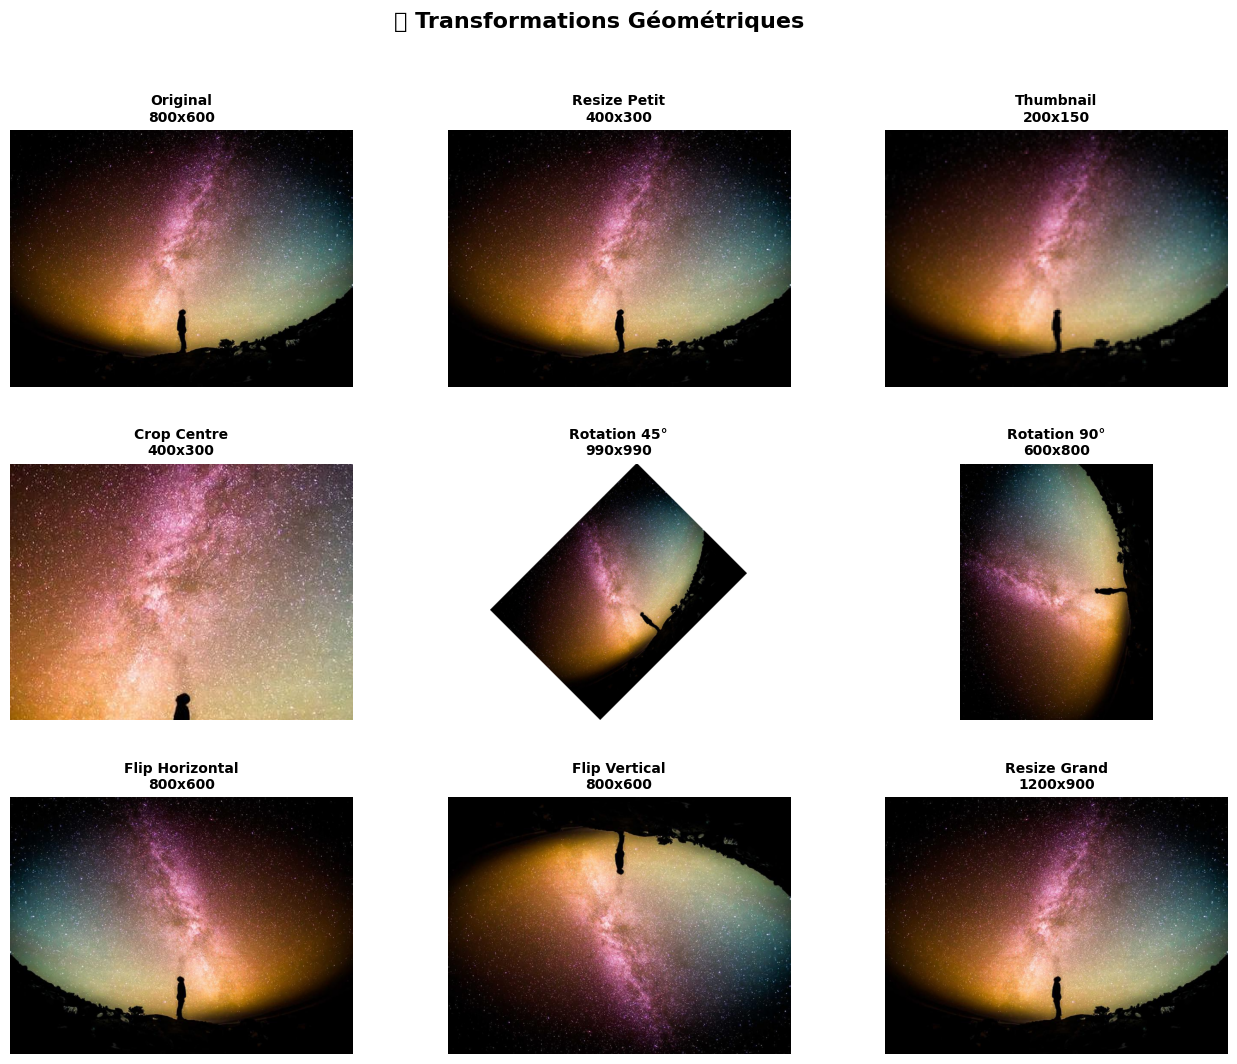


✅ 8 transformations effectuées


In [4]:
if enable_transformations:
    print("\n✂️ TRANSFORMATIONS GÉOMÉTRIQUES")
    print("=" * 50)
    
    # Préparation des transformations
    transformations = {}
    
    # 1. Resize (redimensionnement)
    print("\n1️⃣ Resize (Redimensionnement)")
    resize_small = test_image.resize((400, 300), Image.Resampling.LANCZOS)
    resize_large = test_image.resize((1200, 900), Image.Resampling.LANCZOS)
    transformations['resize_small'] = resize_small
    transformations['resize_large'] = resize_large
    print(f"   ✅ Petite: {resize_small.size}, Grande: {resize_large.size}")
    
    # 2. Thumbnail (proportionnel)
    print("\n2️⃣ Thumbnail (Préserve ratio)")
    thumb = test_image.copy()
    thumb.thumbnail((200, 200), Image.Resampling.LANCZOS)
    transformations['thumbnail'] = thumb
    print(f"   ✅ Thumbnail: {thumb.size}")
    
    # 3. Crop (découpage)
    print("\n3️⃣ Crop (Découpage)")
    width, height = test_image.size
    # Crop centre
    left = width // 4
    top = height // 4
    right = 3 * width // 4
    bottom = 3 * height // 4
    cropped = test_image.crop((left, top, right, bottom))
    transformations['cropped'] = cropped
    print(f"   ✅ Crop centre: {cropped.size}")
    
    # 4. Rotation
    print("\n4️⃣ Rotation")
    rotated_45 = test_image.rotate(45, expand=True, fillcolor='white')
    rotated_90 = test_image.rotate(90, expand=True)
    transformations['rotated_45'] = rotated_45
    transformations['rotated_90'] = rotated_90
    print(f"   ✅ 45°: {rotated_45.size}, 90°: {rotated_90.size}")
    
    # 5. Flip (miroir)
    print("\n5️⃣ Flip (Miroir)")
    flipped_h = test_image.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    flipped_v = test_image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
    transformations['flipped_h'] = flipped_h
    transformations['flipped_v'] = flipped_v
    print(f"   ✅ Horizontal et Vertical")
    
    # Visualisation en grille
    fig = plt.figure(figsize=(16, 12))
    gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.2)
    
    display_items = [
        (test_image, "Original", 0, 0),
        (resize_small, "Resize Petit", 0, 1),
        (thumb, "Thumbnail", 0, 2),
        (cropped, "Crop Centre", 1, 0),
        (rotated_45, "Rotation 45°", 1, 1),
        (rotated_90, "Rotation 90°", 1, 2),
        (flipped_h, "Flip Horizontal", 2, 0),
        (flipped_v, "Flip Vertical", 2, 1),
        (resize_large, "Resize Grand", 2, 2)
    ]
    
    for img, title, row, col in display_items:
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(img)
        ax.set_title(f"{title}\n{img.size[0]}x{img.size[1]}", 
                    fontsize=10, fontweight='bold')
        ax.axis('off')
    
    plt.suptitle("🔧 Transformations Géométriques", fontsize=16, fontweight='bold', y=0.98)
    plt.show()
    
    print(f"\n✅ {len(transformations)} transformations effectuées")
else:
    print("\n⏭️  Transformations désactivées (enable_transformations=False)")

## 🎨 Section 3: Filtres et Effets

Application de filtres classiques pour améliorer ou styliser les images.


🎨 FILTRES ET EFFETS

1️⃣ Blur (Flou)
   ✅ Blur basique et Gaussian Blur appliqués

2️⃣ Sharpen (Augmentation netteté)
   ✅ Sharpen et UnsharpMask appliqués

3️⃣ Edge Detection (Détection contours)
   ✅ Find Edges et Edge Enhance appliqués

4️⃣ Contour et Emboss (Relief)
   ✅ Contour et Emboss appliqués

5️⃣ Ajustements (Brightness, Contrast, Color)
   ✅ Brightness, Contrast, Color ajustés


C:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


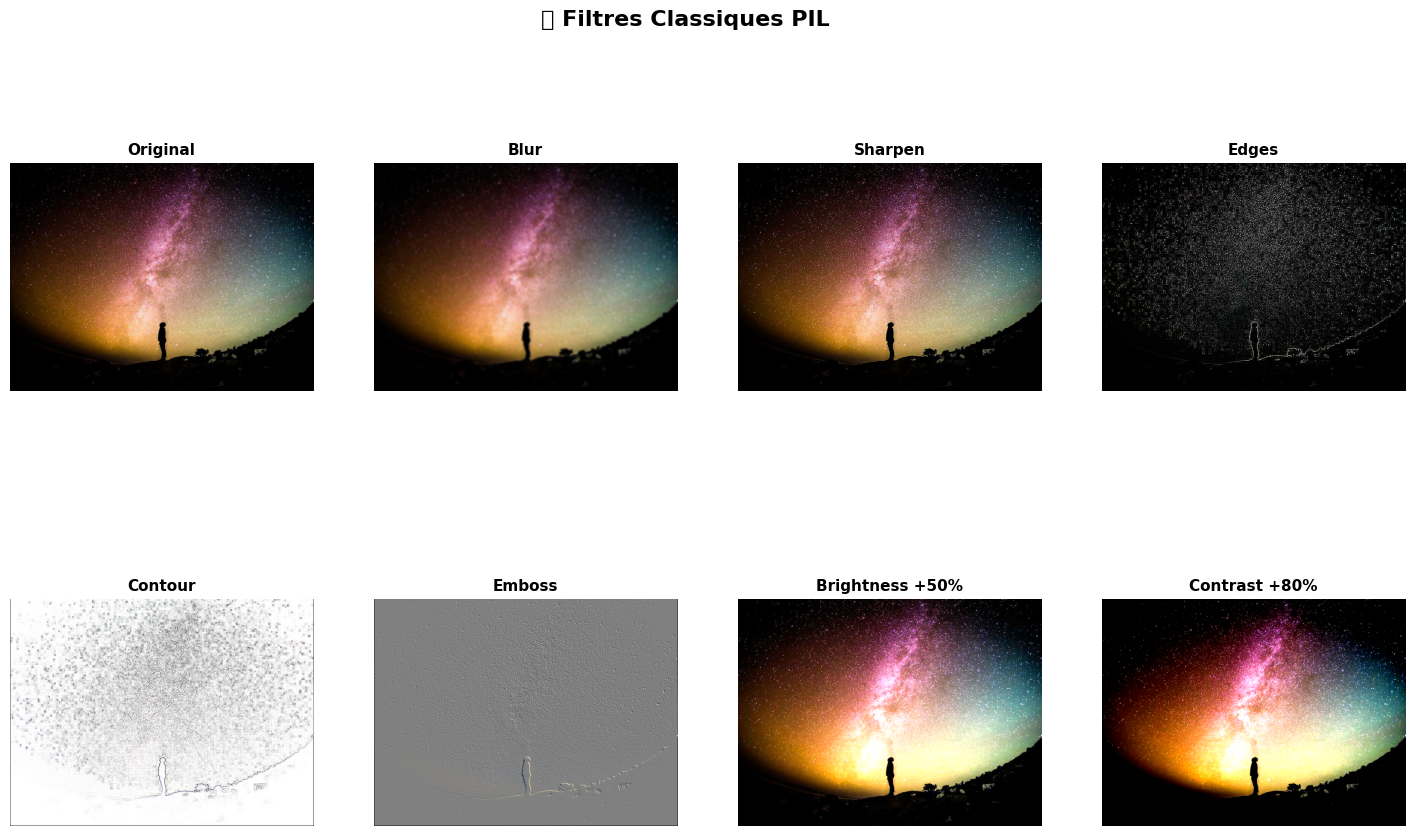


✅ 14 filtres/effets appliqués


In [5]:
if enable_filters:
    print("\n🎨 FILTRES ET EFFETS")
    print("=" * 50)
    
    filters_applied = {}
    
    # 1. Blur (Flou)
    print("\n1️⃣ Blur (Flou)")
    blur = test_image.filter(ImageFilter.BLUR)
    gaussian_blur = test_image.filter(ImageFilter.GaussianBlur(radius=5))
    filters_applied['blur'] = blur
    filters_applied['gaussian_blur'] = gaussian_blur
    print(f"   ✅ Blur basique et Gaussian Blur appliqués")
    
    # 2. Sharpen (Netteté)
    print("\n2️⃣ Sharpen (Augmentation netteté)")
    sharpen = test_image.filter(ImageFilter.SHARPEN)
    unsharp_mask = test_image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
    filters_applied['sharpen'] = sharpen
    filters_applied['unsharp'] = unsharp_mask
    print(f"   ✅ Sharpen et UnsharpMask appliqués")
    
    # 3. Edge Detection (Détection contours)
    print("\n3️⃣ Edge Detection (Détection contours)")
    edges = test_image.filter(ImageFilter.FIND_EDGES)
    edges_enhanced = test_image.filter(ImageFilter.EDGE_ENHANCE)
    filters_applied['edges'] = edges
    filters_applied['edges_enhanced'] = edges_enhanced
    print(f"   ✅ Find Edges et Edge Enhance appliqués")
    
    # 4. Contour et Emboss
    print("\n4️⃣ Contour et Emboss (Relief)")
    contour = test_image.filter(ImageFilter.CONTOUR)
    emboss = test_image.filter(ImageFilter.EMBOSS)
    filters_applied['contour'] = contour
    filters_applied['emboss'] = emboss
    print(f"   ✅ Contour et Emboss appliqués")
    
    # 5. Ajustements (Luminosité, Contraste, Couleur)
    print("\n5️⃣ Ajustements (Brightness, Contrast, Color)")
    
    # Brightness
    enhancer_brightness = ImageEnhance.Brightness(test_image)
    brightened = enhancer_brightness.enhance(1.5)  # +50%
    darkened = enhancer_brightness.enhance(0.7)    # -30%
    filters_applied['brightened'] = brightened
    filters_applied['darkened'] = darkened
    
    # Contrast
    enhancer_contrast = ImageEnhance.Contrast(test_image)
    high_contrast = enhancer_contrast.enhance(1.8)
    low_contrast = enhancer_contrast.enhance(0.5)
    filters_applied['high_contrast'] = high_contrast
    filters_applied['low_contrast'] = low_contrast
    
    # Color
    enhancer_color = ImageEnhance.Color(test_image)
    saturated = enhancer_color.enhance(1.5)
    desaturated = enhancer_color.enhance(0.3)
    filters_applied['saturated'] = saturated
    filters_applied['desaturated'] = desaturated
    
    print(f"   ✅ Brightness, Contrast, Color ajustés")
    
    # Visualisation des filtres classiques
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 4, figure=fig, hspace=0.3, wspace=0.2)
    
    classic_filters = [
        (test_image, "Original", 0, 0),
        (blur, "Blur", 0, 1),
        (sharpen, "Sharpen", 0, 2),
        (edges, "Edges", 0, 3),
        (contour, "Contour", 1, 0),
        (emboss, "Emboss", 1, 1),
        (brightened, "Brightness +50%", 1, 2),
        (high_contrast, "Contrast +80%", 1, 3)
    ]
    
    for img, title, row, col in classic_filters:
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(img)
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.axis('off')
    
    plt.suptitle("🎨 Filtres Classiques PIL", fontsize=16, fontweight='bold', y=0.98)
    plt.show()
    
    print(f"\n✅ {len(filters_applied)} filtres/effets appliqués")
else:
    print("\n⏭️  Filtres désactivés (enable_filters=False)")

## 📋 Section 4: Métadonnées et EXIF

Extraction et manipulation des métadonnées EXIF des images.

In [6]:
if enable_metadata and EXIF_AVAILABLE:
    print("\n📋 MÉTADONNÉES ET EXIF")
    print("=" * 50)
    
    def extract_exif_data(image: Image.Image) -> Dict[str, Any]:
        """Extrait les données EXIF d'une image."""
        exif_data = {}
        
        try:
            exif_raw = image._getexif()
            if exif_raw:
                for tag_id, value in exif_raw.items():
                    tag = ExifTags.TAGS.get(tag_id, tag_id)
                    exif_data[tag] = value
        except AttributeError:
            pass
        
        return exif_data
    
    def display_exif_summary(exif_data: Dict[str, Any]):
        """Affiche un résumé des données EXIF importantes."""
        important_tags = [
            'Make', 'Model', 'DateTime', 'DateTimeOriginal',
            'ExposureTime', 'FNumber', 'ISOSpeedRatings',
            'FocalLength', 'Flash', 'WhiteBalance',
            'ImageWidth', 'ImageHeight', 'Orientation'
        ]
        
        print("\n📊 Données EXIF importantes:")
        found_tags = 0
        for tag in important_tags:
            if tag in exif_data:
                value = exif_data[tag]
                # Formatage spécial pour certains tags
                if tag == 'ExposureTime':
                    value = f"1/{int(1/value)}s" if value < 1 else f"{value}s"
                elif tag == 'FNumber':
                    value = f"f/{value}"
                elif tag == 'FocalLength':
                    value = f"{value}mm"
                
                print(f"   📌 {tag}: {value}")
                found_tags += 1
        
        if found_tags == 0:
            print("   ℹ️  Aucune donnée EXIF standard trouvée")
        
        return found_tags
    
    # Extraction EXIF de l'image de test
    print("\n🔍 Analyse de l'image de test...")
    exif_data = extract_exif_data(test_image)
    
    if exif_data:
        exif_count = display_exif_summary(exif_data)
        print(f"\n✅ {exif_count} tags EXIF importants trouvés")
        print(f"📦 Total tags EXIF: {len(exif_data)}")
    else:
        print("ℹ️  Image de test sans données EXIF")
        print("💡 Les images générées ou téléchargées n'ont souvent pas d'EXIF")
    
    # Démonstration: ajout de métadonnées personnalisées
    print("\n➕ AJOUT DE MÉTADONNÉES PERSONNALISÉES")
    print("=" * 50)
    
    from PIL import PngImagePlugin
    
    # Création d'une copie avec métadonnées
    img_with_metadata = test_image.copy()
    
    # Métadonnées PNG
    metadata = PngImagePlugin.PngInfo()
    metadata.add_text("Title", "Image de démonstration CoursIA")
    metadata.add_text("Author", "GenAI Tutorial System")
    metadata.add_text("Copyright", f"© {datetime.now().year} CoursIA")
    metadata.add_text("Description", "Image créée pour tutoriel opérations de base")
    metadata.add_text("Software", "Python PIL/Pillow")
    metadata.add_text("CreationDate", datetime.now().isoformat())
    
    # Sauvegarde avec métadonnées
    metadata_file = OUTPUT_DIR / "image_with_metadata.png"
    img_with_metadata.save(metadata_file, "PNG", pnginfo=metadata)
    print(f"✅ Image sauvegardée avec métadonnées: {metadata_file.name}")
    
    # Vérification
    img_loaded = Image.open(metadata_file)
    if hasattr(img_loaded, 'text'):
        print(f"\n📋 Métadonnées PNG ajoutées:")
        for key, value in img_loaded.text.items():
            print(f"   • {key}: {value}")
    
    print(f"\n💡 Les métadonnées PNG sont idéales pour:")
    print(f"   • Attribution et copyright")
    print(f"   • Traçabilité de génération AI")
    print(f"   • Informations de traitement")
    print(f"   • Versioning d'images")

elif not EXIF_AVAILABLE:
    print("\n⚠️  ExifTags non disponible - section métadonnées ignorée")
else:
    print("\n⏭️  Métadonnées désactivées (enable_metadata=False)")


📋 MÉTADONNÉES ET EXIF

🔍 Analyse de l'image de test...

📊 Données EXIF importantes:
   📌 Orientation: 1

✅ 1 tags EXIF importants trouvés
📦 Total tags EXIF: 13

➕ AJOUT DE MÉTADONNÉES PERSONNALISÉES
✅ Image sauvegardée avec métadonnées: image_with_metadata.png

📋 Métadonnées PNG ajoutées:
   • Title: Image de démonstration CoursIA
   • Author: GenAI Tutorial System
   • Copyright: © 2026 CoursIA
   • Description: Image créée pour tutoriel opérations de base
   • Software: Python PIL/Pillow
   • CreationDate: 2026-02-25T20:48:36.790375

💡 Les métadonnées PNG sont idéales pour:
   • Attribution et copyright
   • Traçabilité de génération AI
   • Informations de traitement
   • Versioning d'images


## 🔗 Section 5: Intégration avec APIs de Génération

Préparation et post-traitement d'images pour les APIs (DALL-E, Stable Diffusion, etc.).

In [7]:
print("\n🔗 INTÉGRATION AVEC APIs DE GÉNÉRATION")
print("=" * 50)

def prepare_for_api(image: Image.Image,
                   target_size: Optional[Tuple[int, int]] = None,
                   max_size_kb: Optional[int] = None,
                   format: str = "PNG") -> Tuple[bytes, Dict[str, Any]]:
    """
    Prépare une image pour upload vers une API.
    
    Args:
        image: Image PIL
        target_size: Dimensions cibles (optionnel)
        max_size_kb: Taille max en KB (optionnel)
        format: Format de sortie
    
    Returns:
        Tuple (données binaires, métadonnées)
    """
    img = image.copy()
    
    # Resize si nécessaire
    if target_size:
        img = img.resize(target_size, Image.Resampling.LANCZOS)
    
    # Conversion en bytes
    buffer = BytesIO()
    save_kwargs = {}
    
    if format.upper() == "JPEG":
        # Conversion RGB si nécessaire pour JPEG
        if img.mode in ('RGBA', 'LA', 'P'):
            rgb_img = Image.new('RGB', img.size, (255, 255, 255))
            if img.mode == 'P':
                img = img.convert('RGBA')
            rgb_img.paste(img, mask=img.split()[-1] if 'A' in img.mode else None)
            img = rgb_img
        save_kwargs['quality'] = 95
        save_kwargs['optimize'] = True
    
    img.save(buffer, format=format, **save_kwargs)
    img_bytes = buffer.getvalue()
    
    # Compression supplémentaire si nécessaire
    if max_size_kb and len(img_bytes) > max_size_kb * 1024:
        quality = 90
        while len(img_bytes) > max_size_kb * 1024 and quality > 20:
            buffer = BytesIO()
            if format.upper() == "JPEG":
                img.save(buffer, format="JPEG", quality=quality, optimize=True)
            else:
                img.save(buffer, format=format, optimize=True)
            img_bytes = buffer.getvalue()
            quality -= 10
    
    metadata = {
        "size": img.size,
        "format": format,
        "size_kb": len(img_bytes) / 1024,
        "mode": img.mode
    }
    
    return img_bytes, metadata

def encode_image_base64(image: Image.Image, format: str = "PNG") -> str:
    """
    Encode une image en base64 pour APIs.
    
    Args:
        image: Image PIL
        format: Format d'encodage
    
    Returns:
        String base64
    """
    buffer = BytesIO()
    image.save(buffer, format=format)
    return base64.b64encode(buffer.getvalue()).decode('utf-8')

print("\n📦 Préparation pour différentes APIs:")
print("=" * 50)

# 1. DALL-E 3 (via OpenRouter)
print("\n1️⃣ DALL-E 3 / OpenAI")
print("   Requirements: PNG/JPEG, max 20MB, carrés recommandés")
dalle_sizes = [(1024, 1024), (1792, 1024), (1024, 1792)]
for size in dalle_sizes:
    dalle_bytes, dalle_meta = prepare_for_api(test_image, target_size=size, format="PNG")
    print(f"   ✅ {size[0]}x{size[1]}: {dalle_meta['size_kb']:.1f} KB")

# 2. Stable Diffusion img2img
print("\n2️⃣ Stable Diffusion (img2img)")
print("   Requirements: 512x512 ou 768x768, PNG recommandé")
sd_sizes = [(512, 512), (768, 768)]
for size in sd_sizes:
    sd_bytes, sd_meta = prepare_for_api(test_image, target_size=size, max_size_kb=500, format="PNG")
    print(f"   ✅ {size[0]}x{size[1]}: {sd_meta['size_kb']:.1f} KB")

# 3. GPT-5 Vision (analyse)
print("\n3️⃣ GPT-5 Vision (OpenRouter)")
print("   Requirements: Base64, formats variés acceptés")
gpt5_base64 = encode_image_base64(test_image.resize((800, 600)), format="JPEG")
print(f"   ✅ Base64 encoded: {len(gpt5_base64)} chars")
print(f"   ✅ Payload size: ~{len(gpt5_base64) / 1024:.1f} KB")

# Démonstration payload GPT-5
print("\n📤 Exemple Payload GPT-5 Vision:")
payload_example = {
    "model": "openai/gpt-5o-mini",
    "messages": [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Décris cette image en détail."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{gpt5_base64[:50]}..."
                    }
                }
            ]
        }
    ]
}
print(json.dumps(payload_example, indent=2)[:500] + "...")

print("\n💡 Bonnes pratiques:")
print("   • Toujours vérifier les limites de taille de l'API")
print("   • Utiliser le format recommandé (PNG/JPEG)")
print("   • Resize aux dimensions cibles avant upload")
print("   • Compresser si nécessaire sans perte de qualité")
print("   • Conserver métadonnées pour traçabilité")


🔗 INTÉGRATION AVEC APIs DE GÉNÉRATION

📦 Préparation pour différentes APIs:

1️⃣ DALL-E 3 / OpenAI
   Requirements: PNG/JPEG, max 20MB, carrés recommandés


   ✅ 1024x1024: 1225.2 KB


   ✅ 1792x1024: 1839.2 KB
   ✅ 1024x1792: 1783.4 KB

2️⃣ Stable Diffusion (img2img)
   Requirements: 512x512 ou 768x768, PNG recommandé


   ✅ 512x512: 380.3 KB


   ✅ 768x768: 774.9 KB

3️⃣ GPT-5 Vision (OpenRouter)
   Requirements: Base64, formats variés acceptés
   ✅ Base64 encoded: 103776 chars
   ✅ Payload size: ~101.3 KB

📤 Exemple Payload GPT-5 Vision:
{
  "model": "openai/gpt-5o-mini",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "D\u00e9cris cette image en d\u00e9tail."
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ..."
          }
        }
      ]
    }
  ]
}...

💡 Bonnes pratiques:
   • Toujours vérifier les limites de taille de l'API
   • Utiliser le format recommandé (PNG/JPEG)
   • Resize aux dimensions cibles avant upload
   • Compresser si nécessaire sans perte de qualité
   • Conserver métadonnées pour traçabilité


## 🎮 Section 6: Interface Interactive (Widgets)

Utilisation de widgets pour manipulation interactive d'images.

In [ ]:
if show_interactive_demo and WIDGETS_AVAILABLE and notebook_mode == "interactive" and not skip_widgets:
    print("\n🎮 INTERFACE INTERACTIVE")
    print("=" * 50)
    
    # Widget pour ajustements d'image
    brightness_slider = widgets.FloatSlider(
        value=1.0, min=0.3, max=2.0, step=0.1,
        description='Luminosité:',
        style={'description_width': '120px'}
    )
    
    contrast_slider = widgets.FloatSlider(
        value=1.0, min=0.3, max=2.0, step=0.1,
        description='Contraste:',
        style={'description_width': '120px'}
    )
    
    saturation_slider = widgets.FloatSlider(
        value=1.0, min=0.0, max=2.0, step=0.1,
        description='Saturation:',
        style={'description_width': '120px'}
    )
    
    sharpness_slider = widgets.FloatSlider(
        value=1.0, min=0.0, max=3.0, step=0.1,
        description='Netteté:',
        style={'description_width': '120px'}
    )
    
    rotation_slider = widgets.IntSlider(
        value=0, min=-180, max=180, step=5,
        description='Rotation:',
        style={'description_width': '120px'}
    )
    
    output = widgets.Output()
    
    def update_image(brightness, contrast, saturation, sharpness, rotation):
        """Mise à jour de l'image avec les paramètres."""
        with output:
            output.clear_output(wait=True)
            
            # Application des transformations
            img = test_image.copy()
            
            # Rotation
            if rotation != 0:
                img = img.rotate(rotation, expand=False, fillcolor='white')
            
            # Ajustements
            if brightness != 1.0:
                enhancer = ImageEnhance.Brightness(img)
                img = enhancer.enhance(brightness)
            
            if contrast != 1.0:
                enhancer = ImageEnhance.Contrast(img)
                img = enhancer.enhance(contrast)
            
            if saturation != 1.0:
                enhancer = ImageEnhance.Color(img)
                img = enhancer.enhance(saturation)
            
            if sharpness != 1.0:
                enhancer = ImageEnhance.Sharpness(img)
                img = enhancer.enhance(sharpness)
            
            # Affichage
            fig, ax = plt.subplots(figsize=(10, 8))
            ax.imshow(img)
            ax.set_title(
                f"🎨 Image Ajustée\n"
                f"Lum: {brightness:.1f} | Cont: {contrast:.1f} | Sat: {saturation:.1f} | "
                f"Net: {sharpness:.1f} | Rot: {rotation}°",
                fontsize=12, fontweight='bold'
            )
            ax.axis('off')
            plt.tight_layout()
            plt.show()
    
    # Interface interactive
    interactive_ui = widgets.interactive(
        update_image,
        brightness=brightness_slider,
        contrast=contrast_slider,
        saturation=saturation_slider,
        sharpness=sharpness_slider,
        rotation=rotation_slider
    )
    
    # Bouton de sauvegarde
    save_button = widgets.Button(
        description='💾 Sauvegarder',
        button_style='success',
        tooltip='Sauvegarder l\'image avec les ajustements actuels'
    )
    
    def on_save_click(b):
        with output:
            # Récupérer les valeurs actuelles
            img = test_image.copy()
            
            if rotation_slider.value != 0:
                img = img.rotate(rotation_slider.value, expand=False, fillcolor='white')
            
            if brightness_slider.value != 1.0:
                img = ImageEnhance.Brightness(img).enhance(brightness_slider.value)
            if contrast_slider.value != 1.0:
                img = ImageEnhance.Contrast(img).enhance(contrast_slider.value)
            if saturation_slider.value != 1.0:
                img = ImageEnhance.Color(img).enhance(saturation_slider.value)
            if sharpness_slider.value != 1.0:
                img = ImageEnhance.Sharpness(img).enhance(sharpness_slider.value)
            
            # Sauvegarde
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = f"adjusted_image_{timestamp}.png"
            filepath = OUTPUT_DIR / filename
            img.save(filepath)
            
            print(f"\n✅ Image sauvegardée: {filename}")
    
    save_button.on_click(on_save_click)
    
    # Affichage de l'interface
    print("\n🎨 Utilisez les sliders pour ajuster l'image en temps réel:")
    display(interactive_ui)
    display(save_button)
    display(output)
    
elif not WIDGETS_AVAILABLE:
    print("\n⚠️  ipywidgets non disponible - interface interactive désactivée")
elif skip_widgets:
    print("\n🤖 Mode batch - Interface interactive désactivée (skip_widgets=True)")
else:
    print("\n⏭️  Interface interactive désactivée (show_interactive_demo=False)")

## 📊 Section 7: Conversion de Formats et Optimisation

Conversion entre formats et optimisation de la taille des fichiers.

In [ ]:
print("\n📊 CONVERSION DE FORMATS ET OPTIMISATION")
print("=" * 50)

def compare_formats(image: Image.Image) -> Dict[str, Dict[str, Any]]:
    """
    Compare différents formats pour une même image.
    
    Returns:
        Dict avec statistiques par format
    """
    results = {}
    formats_to_test = [
        ('PNG', {'optimize': True}),
        ('JPEG', {'quality': 95, 'optimize': True}),
        ('JPEG', {'quality': 85, 'optimize': True}),
        ('JPEG', {'quality': 75, 'optimize': True}),
        ('WEBP', {'quality': 90})
    ]
    
    for fmt, kwargs in formats_to_test:
        buffer = BytesIO()
        
        # Gestion spéciale pour JPEG (pas de transparence)
        img_to_save = image
        if fmt == 'JPEG' and image.mode in ('RGBA', 'LA', 'P'):
            img_to_save = image.convert('RGB')
        
        try:
            img_to_save.save(buffer, format=fmt, **kwargs)
            size_bytes = len(buffer.getvalue())
            
            key = f"{fmt}"
            if 'quality' in kwargs:
                key += f"_Q{kwargs['quality']}"
            
            results[key] = {
                'format': fmt,
                'size_bytes': size_bytes,
                'size_kb': size_bytes / 1024,
                'compression_ratio': size_bytes / (image.size[0] * image.size[1] * 3),
                'params': kwargs
            }
        except Exception as e:
            logger.warning(f"Format {fmt} non supporté: {e}")
    
    return results

print("\n🔍 Comparaison des formats de sortie:")
format_comparison = compare_formats(test_image)

# Tri par taille
sorted_formats = sorted(format_comparison.items(), key=lambda x: x[1]['size_kb'])

print(f"\n📊 Résultats (du plus léger au plus lourd):")
print(f"{'Format':<15} {'Taille (KB)':<15} {'Ratio':<10} {'Params'}")
print("-" * 70)

for name, data in sorted_formats:
    params_str = ", ".join([f"{k}={v}" for k, v in data['params'].items()])
    print(f"{name:<15} {data['size_kb']:>10.2f} KB   {data['compression_ratio']:>6.3f}    {params_str}")

# Meilleur rapport qualité/taille
best_format = sorted_formats[0][0]
worst_format = sorted_formats[-1][0]
saving = (1 - sorted_formats[0][1]['size_kb'] / sorted_formats[-1][1]['size_kb']) * 100

print(f"\n💡 Insights:")
print(f"   🥇 Plus efficace: {best_format} ({sorted_formats[0][1]['size_kb']:.1f} KB)")
print(f"   📊 Moins efficace: {worst_format} ({sorted_formats[-1][1]['size_kb']:.1f} KB)")
print(f"   💾 Économie maximale: {saving:.1f}%")

print(f"\n📋 Recommandations par cas d'usage:")
print(f"   🎨 Qualité maximale: PNG (lossless, supporte transparence)")
print(f"   📸 Photos web: JPEG Q85 (bon compromis qualité/taille)")
print(f"   🚀 Performance web: WEBP (meilleure compression moderne)")
print(f"   📱 Thumbnails: JPEG Q75 (taille minimale acceptable)")

if save_results:
    print(f"\n💾 Sauvegarde des comparaisons...")
    for name, data in format_comparison.items():
        buffer = BytesIO()
        img_to_save = test_image
        if data['format'] == 'JPEG' and test_image.mode in ('RGBA', 'LA', 'P'):
            img_to_save = test_image.convert('RGB')
        
        img_to_save.save(buffer, format=data['format'], **data['params'])
        
        filename = f"comparison_{name.lower().replace(' ', '_')}.{data['format'].lower()}"
        filepath = OUTPUT_DIR / filename
        with open(filepath, 'wb') as f:
            f.write(buffer.getvalue())
        
        print(f"   ✅ {filename} ({data['size_kb']:.1f} KB)")

print(f"\n✅ Analyse de formats terminée")

## 📚 Section 8: Récapitulatif et Ressources

Résumé des opérations couvertes et ressources supplémentaires.

In [ ]:
print("\n📚 RÉCAPITULATIF ET RESSOURCES")
print("=" * 50)

print("\n✅ Opérations Couvertes dans ce Notebook:")
print("\n1️⃣ Chargement et Formats")
print("   • Chargement depuis URL/fichier")
print("   • Création d'images de test")
print("   • Analyse des propriétés de base")

print("\n2️⃣ Transformations Géométriques")
print("   • Resize (avec préservation qualité)")
print("   • Thumbnail (proportionnel)")
print("   • Crop (découpage)")
print("   • Rotation (avec angles personnalisés)")
print("   • Flip (miroir horizontal/vertical)")

print("\n3️⃣ Filtres et Effets")
print("   • Blur (flou basique et Gaussian)")
print("   • Sharpen (netteté)")
print("   • Edge Detection (contours)")
print("   • Emboss (relief)")
print("   • Ajustements (brightness, contrast, saturation)")

if enable_metadata:
    print("\n4️⃣ Métadonnées et EXIF")
    print("   • Extraction données EXIF")
    print("   • Ajout métadonnées personnalisées")
    print("   • Traçabilité et attribution")

print("\n5️⃣ Intégration APIs")
print("   • Préparation pour DALL-E 3")
print("   • Optimisation pour Stable Diffusion")
print("   • Encodage Base64 pour GPT-5 Vision")
print("   • Gestion des contraintes API")

if show_interactive_demo and WIDGETS_AVAILABLE:
    print("\n6️⃣ Interface Interactive")
    print("   • Widgets pour ajustements en temps réel")
    print("   • Sauvegarde des modifications")

print("\n7️⃣ Optimisation")
print("   • Comparaison de formats")
print("   • Compression intelligente")
print("   • Recommandations par cas d'usage")

print("\n📖 Ressources Complémentaires:")
print("\n🔗 Documentation Pillow:")
print("   • https://pillow.readthedocs.io/")
print("   • Guide complet des filtres et transformations")

print("\n🔗 Tutorials CoursIA:")
print("   • tutorials/dalle3-complete-guide.md")
print("   • tutorials/gpt5-image-analysis-guide.md")
print("   • tutorials/educational-workflows.md")

print("\n🔗 Notebooks Suivants:")
print("   • 02-1-Prompt-Engineering-Visual.ipynb")
print("   • 02-2-Multi-Model-Comparison.ipynb")
print("   • 03-1-Advanced-Image-Processing.ipynb")

print("\n💡 Prochaines Étapes:")
print("   1. Pratiquer les transformations sur vos propres images")
print("   2. Explorer les filtres avancés de Pillow")
print("   3. Intégrer ces opérations dans vos workflows GenAI")
print("   4. Expérimenter avec les widgets interactifs")

if save_results:
    print(f"\n💾 Fichiers Générés (dans {OUTPUT_DIR}):")
    saved_files = list(OUTPUT_DIR.glob('*'))
    print(f"   📁 Total: {len(saved_files)} fichiers")
    for f in sorted(saved_files)[-10:]:  # Derniers 10
        size_kb = f.stat().st_size / 1024
        print(f"   • {f.name} ({size_kb:.1f} KB)")

print("\n" + "=" * 50)
print("✅ Notebook 01-3-Basic-Image-Operations terminé!")
print("🎓 Vous maîtrisez maintenant les opérations fondamentales sur les images")
print("🚀 Prêt pour les modules suivants!")
print("=" * 50)